<a href="https://colab.research.google.com/github/AlgorithmBurv/PML/blob/main/PML_2_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = "/content/drive/MyDrive/Dataset PML/Iris (1).csv"
load_data = pd.read_csv(path)

In [6]:
# Membuat data frame

df=pd.DataFrame(load_data)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### menghapus kolom id

In [9]:
df = df.drop(columns='Id')


KeyError: ignored

### one hot encoding kolom species

In [11]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


### menggabungkan kolom hasil one hot encoding dan membuang kolom spesies

In [12]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


### konversi dataframe menjadi numpy array

In [13]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

### memisahkan antara atribut dan label

In [14]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [15]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### pembagian data menjadi data latih dan data uji

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

### Untuk arsitektur model menggunakan 3 buah layer. Activation function yang digunakan pada layer terakhir dipilih softmax karena activation tersebut umum dipakai untuk klasifikasi multi kelas seperti ini.

In [17]:
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),])

### Untuk masalah klasifikasi multi kelas menggunakan loss ‘categorical_crossentropy’.

In [18]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
import tensorflow as tf

### callbacks

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai >99%!")
      self.model.stop_training = True
callbacks = myCallback()

In [28]:
hist = model.fit(X_train, Y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0971 - accuracy: 0.9524
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0947 - accuracy: 0.9714
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0947 - accuracy: 0.9619
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0934 - accuracy: 0.9619
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0933 - accuracy: 0.9714
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0927 - accuracy: 0.9619
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0920 - accuracy: 0.9714
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0913 - accuracy: 0.9619
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0902 - accuracy: 0.9714
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9619
Epoch 11/100
4/4 [===========

In [29]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.0945 - accuracy: 0.9778


[0.09447482228279114, 0.9777777791023254]

In [30]:
import matplotlib.pyplot as plt

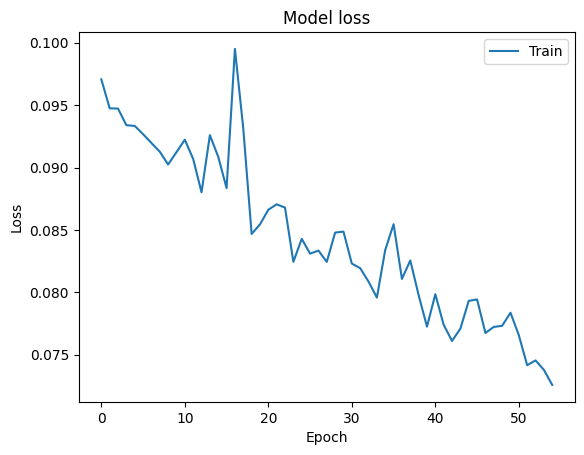

In [31]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

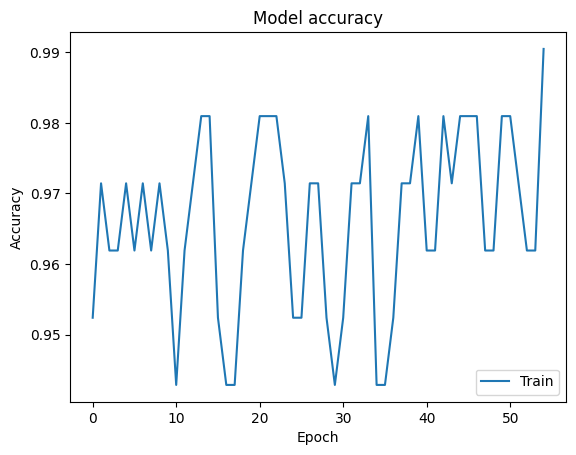

In [32]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()